# Demand Forecasting Code with individual steps

In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [27]:
# Load Data

data = {
    'date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06'],
    'sales': [100, 150, 200, 120, 180, 220]
}

data = pd.DataFrame(data)
data['date'] = pd.to_datetime(data['date'])  # Convert 'date' column to datetime format

print(data)


        date  sales
0 2021-01-01    100
1 2021-01-02    150
2 2021-01-03    200
3 2021-01-04    120
4 2021-01-05    180
5 2021-01-06    220


In [28]:
data.to_csv('sales_data.csv',index=True)

In [7]:
# Explore the data
print(data.head())
print(data.info())

        date  sales
0 2021-01-01    100
1 2021-01-02    150
2 2021-01-03    200
3 2021-01-04    120
4 2021-01-05    180
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6 non-null      datetime64[ns]
 1   sales   6 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 224.0 bytes
None


In [8]:
#Data Preprocessing

data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

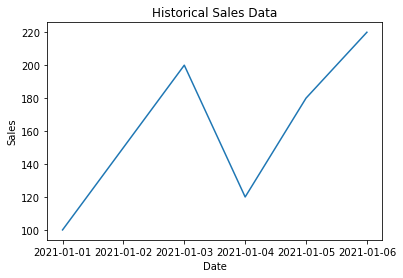

In [9]:
# Visualize Data
plt.plot(data.index, data['sales'])
plt.title('Historical Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [10]:
# Feature Engineering
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day

In [11]:
#Train-Test Split

X = data[['year', 'month', 'day']]  # Features
y = data['sales']                   # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# rain the Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Make Predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluate the Model

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 19.0


In [15]:
# Make Future Demand Predictions
future_dates = pd.date_range(start='2023-06-03', end='2023-12-31', freq='D')  # Adjust the date range as needed
future_data = pd.DataFrame(index=future_dates, columns=['year', 'month', 'day'])

future_data['year'] = future_data.index.year
future_data['month'] = future_data.index.month
future_data['day'] = future_data.index.day

future_predictions = model.predict(future_data)

In [16]:
future_predictions

array([162., 174., 186., 198., 210., 222., 234., 246., 258., 270., 282.,
       294., 306., 318., 330., 342., 354., 366., 378., 390., 402., 414.,
       426., 438., 450., 462., 474., 486., 138., 150., 162., 174., 186.,
       198., 210., 222., 234., 246., 258., 270., 282., 294., 306., 318.,
       330., 342., 354., 366., 378., 390., 402., 414., 426., 438., 450.,
       462., 474., 486., 498., 138., 150., 162., 174., 186., 198., 210.,
       222., 234., 246., 258., 270., 282., 294., 306., 318., 330., 342.,
       354., 366., 378., 390., 402., 414., 426., 438., 450., 462., 474.,
       486., 498., 138., 150., 162., 174., 186., 198., 210., 222., 234.,
       246., 258., 270., 282., 294., 306., 318., 330., 342., 354., 366.,
       378., 390., 402., 414., 426., 438., 450., 462., 474., 486., 138.,
       150., 162., 174., 186., 198., 210., 222., 234., 246., 258., 270.,
       282., 294., 306., 318., 330., 342., 354., 366., 378., 390., 402.,
       414., 426., 438., 450., 462., 474., 486., 49

# Automation Pipeline using Sklearn-Pipeline

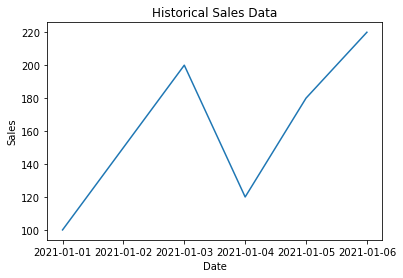

,Unnamed: 0,sales
date,,
2021-01-01,0,100
2021-01-02,1,150
2021-01-03,2,200
2021-01-04,3,120
2021-01-05,4,180
2021-01-06,5,220


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


# Step 1: Load and Explore Data
def load_data(file_path):
    data = pd.read_csv(file_path)
    data['date'] = pd.to_datetime(data['date'])
    return data


# Step 2: Data Preprocessing
def preprocess_data(data):
    data.set_index('date', inplace=True)
    return data


# Step 3: Visualize Data
def visualize_data(data):
    plt.plot(data.index, data['sales'])
    plt.title('Historical Sales Data')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()
    return data


# Step 4: Feature Engineering
def feature_engineering(data):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    return data


# Step 5: Train-Test Split
def perform_train_test_split(data):
    X = data[['year', 'month', 'day']]
    y = data['sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test


# Step 6: Train the Model
def train_model(X_train, y_train):
    model = TransformedTargetRegressor(regressor=LinearRegression())
    model.fit(X_train, y_train)
    return model


# Step 7: Make Predictions
def make_predictions(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred


# Step 8: Evaluate the Model
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    print('Mean Absolute Error:', mae)


# Step 9: Make Future Demand Predictions
def make_future_predictions(model):
    future_dates = pd.date_range(start='2023-06-03', end='2023-12-31', freq='D')
    future_data = pd.DataFrame(index=future_dates, columns=['year', 'month', 'day'])
    future_data['year'] = future_data.index.year
    future_data['month'] = future_data.index.month
    future_data['day'] = future_data.index.day
    future_predictions = model.predict(future_data)
    return future_predictions


# Create the pipeline
pipeline = Pipeline([
    ('load_data', FunctionTransformer(load_data)),
    ('preprocess_data', FunctionTransformer(preprocess_data)),
    ('visualize_data', FunctionTransformer(visualize_data)),
    ('feature_engineering', FunctionTransformer(feature_engineering)),
    ('train_test_split', FunctionTransformer(perform_train_test_split)),
    ('model', FunctionTransformer(train_model)),
    ('make_predictions', FunctionTransformer(make_predictions)),
    ('evaluate_model', FunctionTransformer(evaluate_model)),
    ('make_future_predictions', FunctionTransformer(make_future_predictions))
])

# Load the data
data_file = 'sales_data.csv'
data = pipeline.named_steps['load_data'].transform(data_file)

# Preprocess the data
preprocessed_data = pipeline.named_steps['preprocess_data'].transform(data)

# Visualize the data
pipeline.named_steps['visualize_data'].transform(preprocessed_data)

# Automation Code with manual process

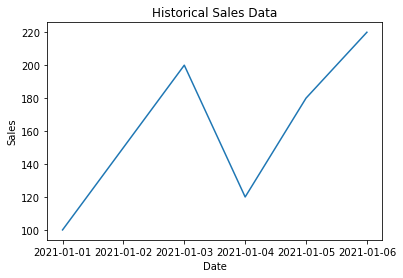

Mean Absolute Error: 19.0
Future Predictions: [162. 174. 186. 198. 210. 222. 234. 246. 258. 270. 282. 294. 306. 318.
 330. 342. 354. 366. 378. 390. 402. 414. 426. 438. 450. 462. 474. 486.
 138. 150. 162. 174. 186. 198. 210. 222. 234. 246. 258. 270. 282. 294.
 306. 318. 330. 342. 354. 366. 378. 390. 402. 414. 426. 438. 450. 462.
 474. 486. 498. 138. 150. 162. 174. 186. 198. 210. 222. 234. 246. 258.
 270. 282. 294. 306. 318. 330. 342. 354. 366. 378. 390. 402. 414. 426.
 438. 450. 462. 474. 486. 498. 138. 150. 162. 174. 186. 198. 210. 222.
 234. 246. 258. 270. 282. 294. 306. 318. 330. 342. 354. 366. 378. 390.
 402. 414. 426. 438. 450. 462. 474. 486. 138. 150. 162. 174. 186. 198.
 210. 222. 234. 246. 258. 270. 282. 294. 306. 318. 330. 342. 354. 366.
 378. 390. 402. 414. 426. 438. 450. 462. 474. 486. 498. 138. 150. 162.
 174. 186. 198. 210. 222. 234. 246. 258. 270. 282. 294. 306. 318. 330.
 342. 354. 366. 378. 390. 402. 414. 426. 438. 450. 462. 474. 486. 138.
 150. 162. 174. 186. 198. 210. 

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer


# Step 1: Load and Explore Data
def load_data(file_path):
    data = pd.read_csv(file_path)
    data['date'] = pd.to_datetime(data['date'])
    return data


# Step 2: Data Preprocessing
def preprocess_data(data):
    data.set_index('date', inplace=True)
    return data


# Step 3: Visualize Data
def visualize_data(data):
    plt.plot(data.index, data['sales'])
    plt.title('Historical Sales Data')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()
    return data


# Step 4: Feature Engineering
def feature_engineering(data):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    return data


# Step 5: Train-Test Split
def perform_train_test_split(data):
    X = data[['year', 'month', 'day']]
    y = data['sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test


# Step 6: Train the Model
def train_model(X_train, y_train):
    model = TransformedTargetRegressor(regressor=LinearRegression())
    model.fit(X_train, y_train)
    return model


# Step 7: Make Predictions
def make_predictions(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred


# Step 8: Evaluate the Model
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    print('Mean Absolute Error:', mae)


# Step 9: Make Future Demand Predictions
def make_future_predictions(model):
    future_dates = pd.date_range(start='2023-06-03', end='2023-12-31', freq='D')
    future_data = pd.DataFrame(index=future_dates, columns=['year', 'month', 'day'])
    future_data['year'] = future_data.index.year
    future_data['month'] = future_data.index.month
    future_data['day'] = future_data.index.day
    future_predictions = model.predict(future_data)
    return future_predictions


# Load and preprocess the data
data_file = 'sales_data.csv'
data = load_data(data_file)
preprocessed_data = preprocess_data(data)

# Visualize the data
visualize_data(preprocessed_data)

# Perform feature engineering
data_with_features = feature_engineering(preprocessed_data)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = perform_train_test_split(data_with_features)

# Train the model
model = train_model(X_train, y_train)

# Make predictions on the test set
y_pred = make_predictions(model, X_test)

# Evaluate the model
evaluate_model(y_test, y_pred)

# Make future demand predictions
future_predictions = make_future_predictions(model)
print('Future Predictions:', future_predictions)